<a href="https://colab.research.google.com/github/jyanivaddi/ERA_V1/blob/master/session_20/S20_StableDiffusion_modular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone "https://github.com/jyanivaddi/ERA_V1.git"
!git -C ERA_V1 pull

fatal: destination path 'ERA_V1' already exists and is not an empty directory.
Already up to date.


In [2]:
import os
import sys
sys.path.append('/content/ERA_V1/session_20')

In [3]:
%pip install -qq -U datasets transformers pyarrow==9.0.0
%pip install -qq --upgrade transformers==4.25.1 diffusers ftfy accelerate


In [4]:
%%capture
!sudo apt -qq install git-lfs
!git config --global credential.helper store

In [5]:
import sys
import torch
sys.path.append('/content/ERA_V1/session_20/')
from stable_diffusion import StableDiffusion
from utils import invert_loss, get_style_embeddings, show_images

In [14]:
style_files = [ None,
               '/content/ERA_V1/session_20/learned_embeds_style_0.bin',
               '/content/ERA_V1/session_20/learned_embeds_style_10.bin',
               '/content/ERA_V1/session_20/learned_embeds_style_8.bin',
               '/content/ERA_V1/session_20/learned_embeds_style_5.bin',
               #'/content/ERA_V1/session_20/learned_embeds_style_9.bin']

torch_device = "cuda" if torch.cuda.is_available() else "cpu"

In [7]:
stable_diffuser = StableDiffusion(torch_device)

Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.5.mlp.fc2.bias', 'vision_model.encoder.layers.7.layer_norm1.weight', 'vision_model.encoder.layers.16.self_attn.k_proj.bias', 'vision_model.encoder.layers.10.self_attn.q_proj.weight', 'vision_model.encoder.layers.3.layer_norm2.weight', 'vision_model.encoder.layers.14.self_attn.q_proj.bias', 'vision_model.encoder.layers.14.mlp.fc2.bias', 'vision_model.encoder.layers.1.self_attn.out_proj.bias', 'vision_model.encoder.layers.22.layer_norm1.bias', 'vision_model.encoder.layers.22.self_attn.v_proj.bias', 'vision_model.encoder.layers.20.self_attn.v_proj.bias', 'vision_model.encoder.layers.16.self_attn.v_proj.bias', 'vision_model.encoder.layers.20.layer_norm2.weight', 'vision_model.encoder.layers.21.self_attn.q_proj.weight', 'vision_model.encoder.layers.1.layer_norm2.bias', 'vision_model.encoder.layers.2.self_attn.v_proj.bias', 'vision_model.encoder.l

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

0 loss: 9.859594345092773
2 loss: 11.76981258392334
4 loss: 8.965667724609375
6 loss: 4.12213659286499
8 loss: 2.6011176109313965
10 loss: 2.0365211963653564
12 loss: 1.8322811126708984
14 loss: 1.7378482818603516
16 loss: 1.6834344863891602
18 loss: 1.686422348022461
20 loss: 1.7251653671264648
22 loss: 1.7835501432418823
24 loss: 1.8299261331558228
26 loss: 1.884873628616333
28 loss: 1.983073353767395


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

0 loss: 5.729868412017822
2 loss: 31.19291114807129
4 loss: 1.9085291624069214
6 loss: 1.7483983039855957
8 loss: 0.5429695844650269
10 loss: 0.48152971267700195
12 loss: 0.4848754107952118
14 loss: 0.16025304794311523
16 loss: 0.09153231233358383
18 loss: 0.08505171537399292
20 loss: 0.08256105333566666
22 loss: 0.08490565419197083
24 loss: 0.09208957105875015
26 loss: 0.10717025399208069
28 loss: 0.1290961652994156


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

0 loss: 14.291410446166992
2 loss: 23.378063201904297
4 loss: 10.349534034729004
6 loss: 6.856915473937988
8 loss: 6.48131799697876
10 loss: 7.713457107543945
12 loss: 6.638064861297607
14 loss: 6.777658939361572
16 loss: 6.895789623260498
18 loss: 6.9731292724609375
20 loss: 7.076676368713379
22 loss: 7.217816352844238
24 loss: 7.3601484298706055
26 loss: 7.484669208526611
28 loss: 7.631206512451172


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

0 loss: 3.0616025924682617
2 loss: 19.6406192779541
4 loss: 9.090738296508789
6 loss: 5.976095199584961
8 loss: 4.1288652420043945
10 loss: 2.8632090091705322
12 loss: 2.775911331176758
14 loss: 2.6395702362060547
16 loss: 2.4667367935180664
18 loss: 2.3344151973724365
20 loss: 2.2829484939575195
22 loss: 2.254107713699341
24 loss: 2.2771737575531006
26 loss: 2.3084185123443604
28 loss: 2.2954282760620117


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

0 loss: 1.5013349056243896
2 loss: 1.686474323272705
4 loss: 9.099160194396973
6 loss: 3.362943172454834
8 loss: 1.3466713428497314
10 loss: 1.0025486946105957
12 loss: 1.0764492750167847
14 loss: 1.427356481552124
16 loss: 1.7647786140441895
18 loss: 1.58389151096344
20 loss: 1.6489801406860352
22 loss: 1.6989837884902954
24 loss: 1.7942547798156738
26 loss: 1.9404265880584717
28 loss: 2.05416202545166


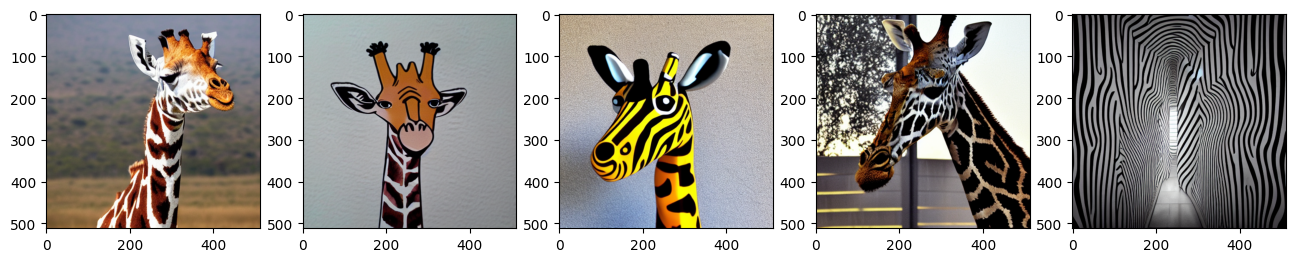

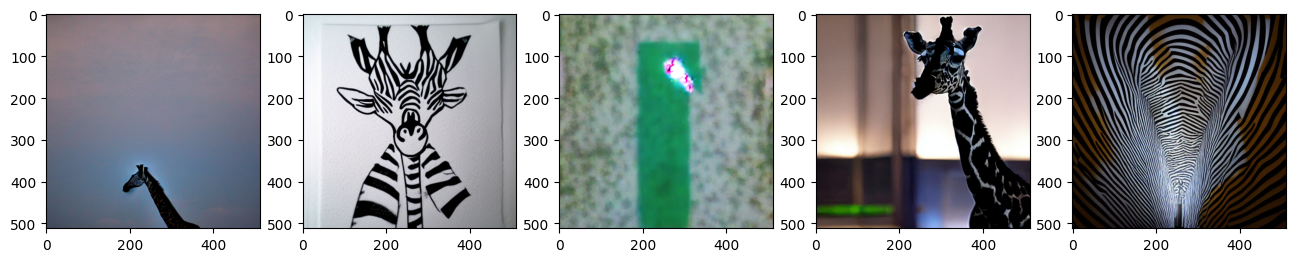

In [15]:
outputs_1 = []
outputs_2 = []
seed_values = [1,2,3,4,5]
prompt = "A Giraffe that looks like a zebra"
#custom_loss_fn = blue_loss
custom_loss_scale = 100.0
num_styles = len(style_files)
for cnt in range(num_styles):
    style_token_embedding = get_style_embeddings(style_files[cnt]) if style_files[cnt] is not None else None
    this_generated_img_1 = stable_diffuser.generate_image_with_custom_style(prompt,
                                                          style_token_embedding = style_token_embedding,
                                                          random_seed = seed_values[cnt],
                                                          custom_loss_fn = None)
    outputs_1.append(this_generated_img_1)
    this_generated_img_2 = stable_diffuser.generate_image_with_custom_style(prompt,
                                                          style_token_embedding = style_token_embedding,
                                                          random_seed = seed_values[cnt],
                                                          custom_loss_fn = invert_loss,
                                                          custom_loss_scale = custom_loss_scale)
    outputs_2.append(this_generated_img_2)


show_images(outputs_1)
show_images(outputs_2)


